In [11]:
import pandas as pd
import zipfile


zip_file_path = 'C:\\Users\\julyj\\Downloads\\archive.zip'  


dataframes = []


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Listar todos los archivos en el ZIP
    file_list = zip_ref.namelist()
    
   
    for file_name in file_list:
        if file_name.endswith('.csv'):  
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)  
                dataframes.append(df)   


combined_df = pd.concat(dataframes, ignore_index=True)


combined_df.to_csv('archivo_combinado.csv', index=False)  

print("El archivo ZIP ha sido procesado y guardado como 'archivo_combinado.csv'.")

El archivo ZIP ha sido procesado y guardado como 'archivo_combinado.csv'.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [21]:
amazon_df = pd.read_csv('archivo_combinado.csv')

In [23]:
amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
amazon_df.shape

(2443651, 9)

In [33]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [35]:
num = amazon_df.select_dtypes(include='number')
cat = amazon_df.select_dtypes(exclude='number')

In [37]:
num.head()

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [41]:
num.nunique()

uid                  2443651
stars                     42
reviews                19446
price                  82916
boughtInLastMonth         25
dtype: int64

### Ejercicio 1. Frequency Tables

In [49]:
frequency_table = amazon_df.category.value_counts()

In [55]:
top_categories = amazon_df['category'].value_counts().head(5)
print(top_categories)  #Top 5 most listed

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


### Ejercicio 2. visualizations: 

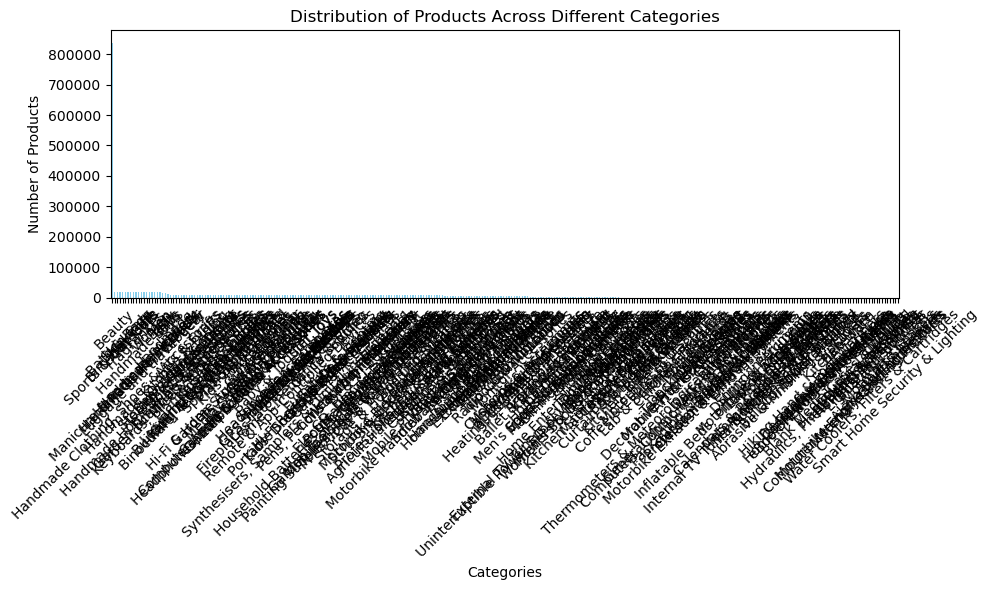

In [75]:
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')  # Asegúrate de usar category_counts aquí
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

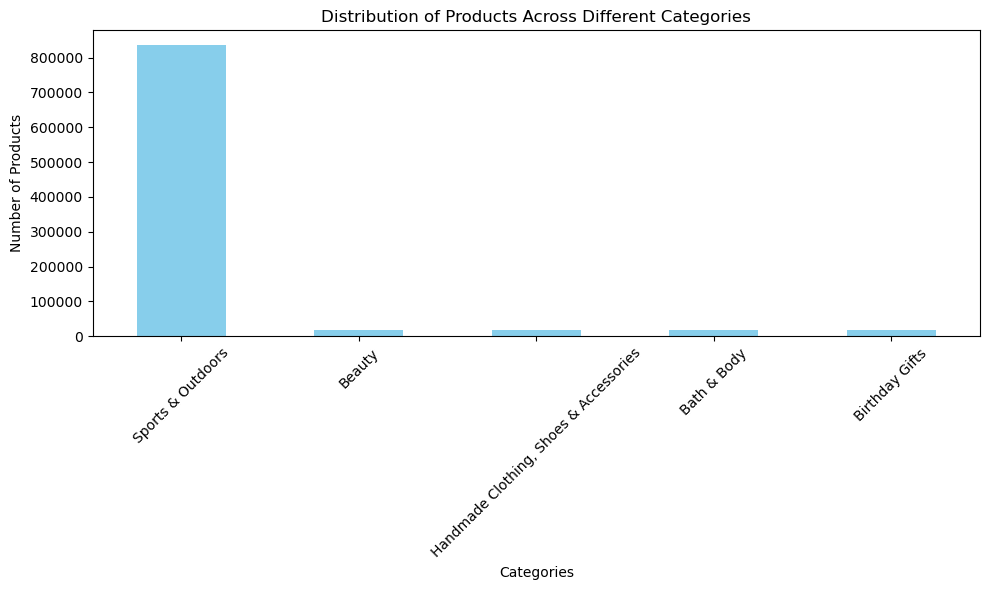

In [77]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')  # Asegúrate de usar category_counts aquí
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

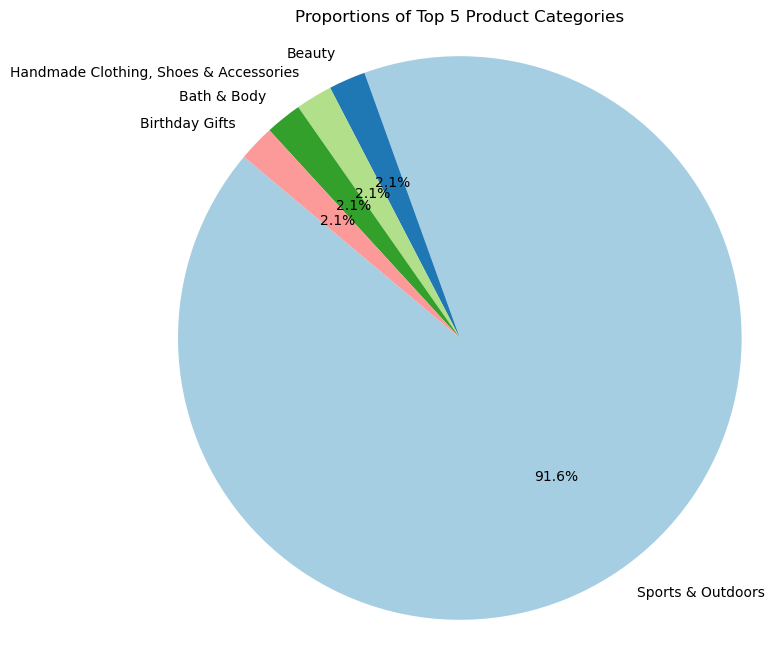

In [79]:
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportions of Top 5 Product Categories')
plt.axis('equal')  
plt.show()

In [81]:
#Sports and Outdoors destaca sobre las demás 

### Part 2: Delving into Product Pricing

In [112]:
average_price = amazon_df.price.mean().round(2)
print(average_price)

89.24


In [108]:
amazon_df.price.median()

19.09

In [114]:
most_common_price = amazon_df.price.mode().round(0)
print(most_common_price)

0    10.0
Name: price, dtype: float64


In [120]:
prices = combined_df['price']
variance = prices.var()
std_dev = prices.std()
price_range = prices.max() - prices.min()
Q1 = prices.quantile(0.25)  
Q3 = prices.quantile(0.75)  
IQR = Q3 - Q1

print(f"Variance of Product Prices: {variance:.2f}")
print(f"Standard Deviation of Product Prices: {std_dev:.2f}")
print(f"Range of Product Prices: {price_range:.2f}")
print(f"Interquartile Range (IQR) of Product Prices: {IQR:.2f}")


Variance of Product Prices: 119445.49
Standard Deviation of Product Prices: 345.61
Range of Product Prices: 100000.00
Interquartile Range (IQR) of Product Prices: 36.00


In [122]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

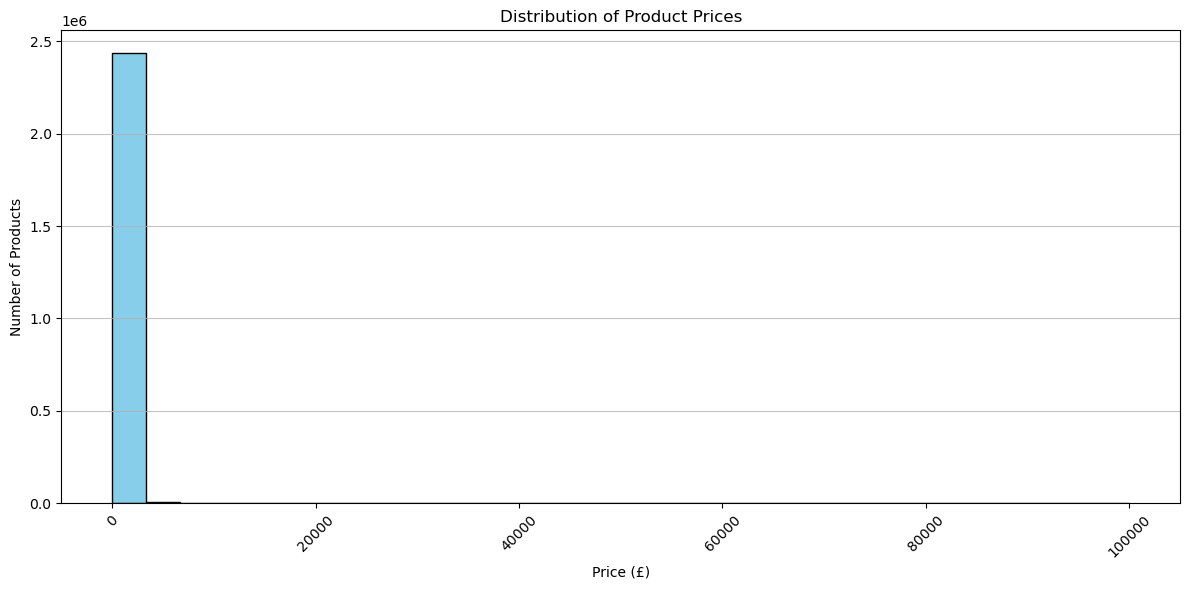

In [124]:
plt.figure(figsize=(12, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

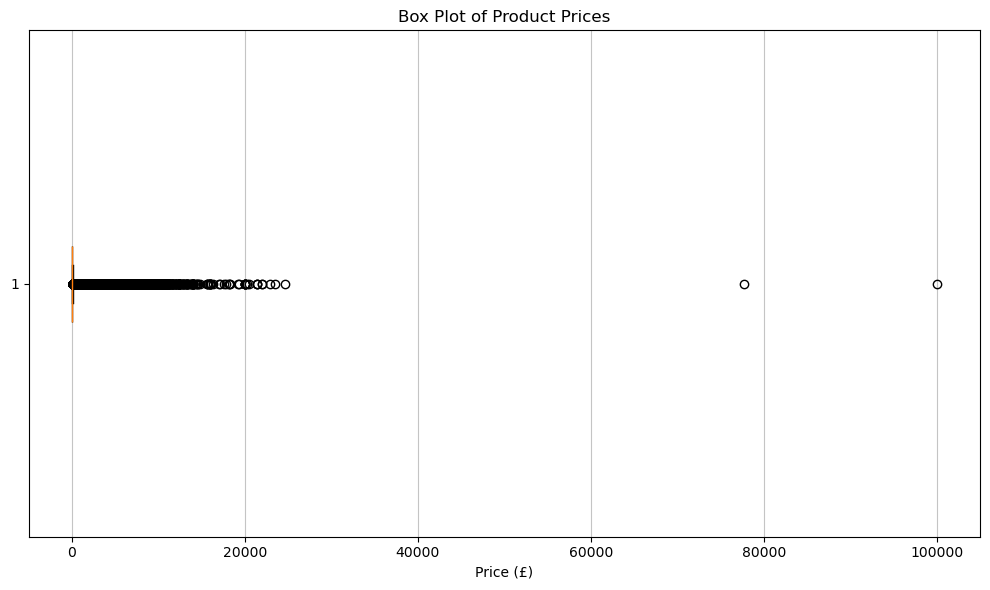

In [126]:
plt.figure(figsize=(10, 6))
plt.boxplot(prices, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

### Part 3: Unpacking Product Ratings

In [131]:
ratings = combined_df['stars']

In [133]:
mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating = ratings.mode()[0]  


print(f"Mean Rating of Products: {mean_rating:.2f}")
print(f"Median Rating of Products: {median_rating:.2f}")
print(f"Mode Rating of Products: {mode_rating:.2f}")

Mean Rating of Products: 2.15
Median Rating of Products: 0.00
Mode Rating of Products: 0.00


In [149]:
variance_rating = ratings.var()
std_dev_rating = ratings.std()
print(variance_rating)
print(std_dev_rating)

4.81743402976196
2.1948653785054697


In [151]:
Q1 = ratings.quantile(0.25)  
Q3 = ratings.quantile(0.75)  
IQR = Q3 - Q1 

In [153]:
print(Q1)
print(Q3)
print(IQR)

0.0
4.4
4.4


In [157]:
skewness = ratings.skew()
kurtosis = ratings.kurtosis() 

print(skewness)
print(kurtosis)

0.08120735761080985
-1.9260061280432985


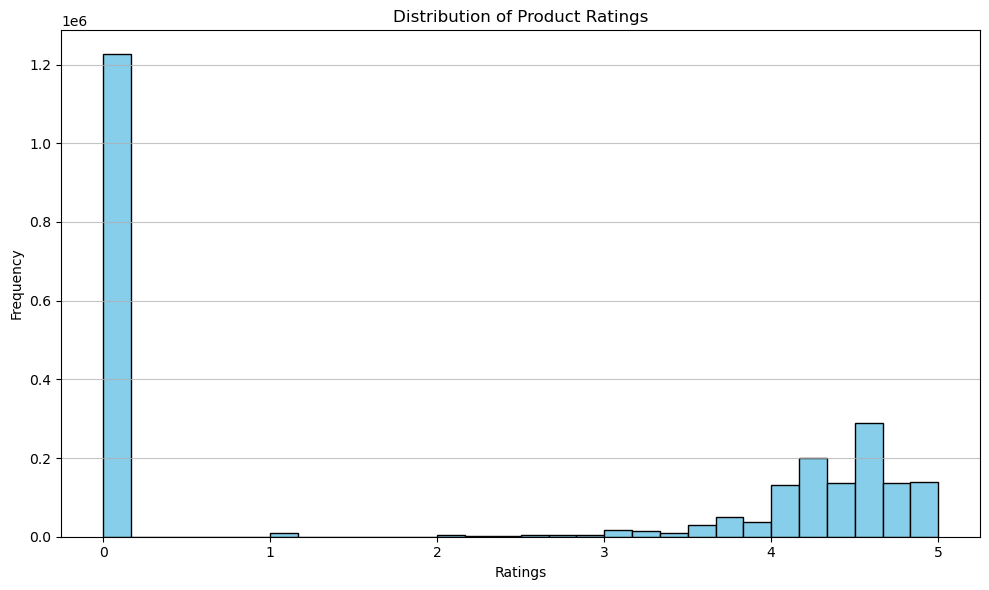

In [159]:
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(range(int(ratings.min()), int(ratings.max()) + 1))  # Adjust x-ticks to cover all rating values
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()